# Lead scoring case study for X education

With about 37 predictor variables provided we have to build a logistic regression model that will help the Sales team focus their energy and time to only the highly coverable candidates. Thereby increase the conversion rate from the current 30%.  

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

pd.set_option('max_columns',None) 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics


In [2]:
# Importing all datasets
df = pd.read_csv("Leads.csv")
df.head(10)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   
5  2058ef08-2858-443e-a01f-a9237db2f5ce       660680                      API   
6  9fae7df4-169d-489b-afe4-0f3d752542ed       660673  Landing Page Submission   
7  20ef72a2-fb3b-45e0-924e-551c5fa59095       660664                      API   
8  cfa0128c-a0da-4656-9d47-0aa4e67bf690       660624  Landing Page Submission   
9  af465dfc-7204-4130-9e05-33231863c4b5       660616                      API   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   
5      Olark Chat           No          No          0          0.0   
6          Google           No          No          1          2.0   
7      Olark Chat           No          No          0          0.0   
8  Direct Traffic           No          No          0          2.0   
9          Google           No          No          0          4.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   
5                            0                   0.0  Olark Chat Conversation   
6                         1640                   2.0             Email Opened   
7                            0                   0.0  Olark Chat Conversation   
8                           71                   2.0             Email Opened   
9                           58                   4.0             Email Opened   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   
5     NaN                      NaN                                NaN   
6   India  Supply Chain Management                      Online Search   
7     NaN                      NaN                                NaN   
8   India   IT Projects Management                                NaN   
9   India       Finance Management                      Word Of Mouth   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   
5                             NaN   
6                      Unemployed   
7                             NaN   
8                             NaN   
9                             NaN   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No      

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#lets look at columns names, whether they are in correct format
df.columns
#there are spaces and uppercase, lets just change it for ease of use 

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [6]:
df.rename(columns= lambda x:x.strip().replace(' ','_').casefold(),inplace=True)

In [7]:
df.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [8]:
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   1438
how_did_you_hear_about_x_education               2207
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [9]:
any(df.duplicated())  #no duplicated entries

False

### Data Cleaning 

Since we have read the data and had our initial inspection. It is seen that there are many columns with the value "Select" entered in the data. 
This "select" is not a relevant information and needs some tweaking. Hence we shall convert all the "Select" data entries to "NaN"

In [10]:
column_list = list(df.columns)
for i in column_list:
    df.loc[df[i]=='Select',i]= np.nan

In [11]:
df.head()

prospect_id  lead_number              lead_origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620     660737.0                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482     660728.0                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a     660727.0  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc     660719.0  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852     660681.0  Landing Page Submission   

      lead_source do_not_email do_not_call  converted  totalvisits  \
0      Olark Chat           No          No        0.0          0.0   
1  Organic Search           No          No        0.0          5.0   
2  Direct Traffic           No          No        1.0          2.0   
3  Direct Traffic           No          No        0.0          1.0   
4          Google           No          No        1.0          2.0   

   total_time_spent_on_website  page_views_per_visit            last_activity  \
0                          0.0                   0.0  Page Visited on Website   
1                        674.0                   2.5             Email Opened   
2                       1532.0                   2.0             Email Opened   
3                        305.0                   1.0              Unreachable   
4                       1428.0                   1.0        Converted to Lead   

  country           specialization how_did_you_hear_about_x_education  \
0     NaN                      NaN                                NaN   
1   India                      NaN                                NaN   
2   India  Business Administration                                NaN   
3   India    Media and Advertising                      Word Of Mouth   
4   India                      NaN                              Other   

  what_is_your_current_occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  what_matters_most_to_you_in_choosing_a_course search magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  newspaper_article x_education_forums newspaper digital_advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  through_recommendations receive_more_updates_about_our_courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  tags      lead_quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  update_me_on_supply_chain_content get_updates_on_dm_content    lead_profile  \
0                                No                        No             NaN   
1                                No                        No             NaN   
2                                No                        No  Potential Lead   
3                            

In [12]:
# checking for any duplicate entries
any(df.duplicated()) 

False

In [13]:
df.prospect_id.is_unique  #all id's are unique

True

#### Treating null/ missing values

In [14]:
#checking no.of missing values in each columns
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [15]:
#now lets check null value counts
len(df.columns[df.isnull().sum()/len(df)*100 < 40])

30

In [16]:
# List of columns that have more than 40% missing values
df.columns[df.isnull().sum()/len(df)*100>40]

Index(['how_did_you_hear_about_x_education', 'lead_quality', 'lead_profile',
       'asymmetrique_activity_index', 'asymmetrique_profile_index',
       'asymmetrique_activity_score', 'asymmetrique_profile_score'],
      dtype='object')

We have around 7 columns with more than 40% null or missing values. The list is as seen above. 

In [17]:
#checking no.of missing values in each columns
df.isnull().sum()

prospect_id                                         0
lead_number                                         0
lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
last_activity                                     103
country                                          2461
specialization                                   3380
how_did_you_hear_about_x_education               7250
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article           

In [18]:
# checking percentage of the missing values in each columns
round(100*(df.isnull().sum()/len(df.index)), 2)

prospect_id                                       0.00
lead_number                                       0.00
lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
last_activity                                     1.11
country                                          26.63
specialization                                   36.58
how_did_you_hear_about_x_education               78.46
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_

Dropping off the above columns with more than 40% missing values we will now create a new dataframe named df1

In [19]:
df1 = df[['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'city', 'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity']]

In [20]:
df1.head()

prospect_id  lead_number              lead_origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620     660737.0                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482     660728.0                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a     660727.0  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc     660719.0  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852     660681.0  Landing Page Submission   

      lead_source do_not_email do_not_call  converted  totalvisits  \
0      Olark Chat           No          No        0.0          0.0   
1  Organic Search           No          No        0.0          5.0   
2  Direct Traffic           No          No        1.0          2.0   
3  Direct Traffic           No          No        0.0          1.0   
4          Google           No          No        1.0          2.0   

   total_time_spent_on_website  page_views_per_visit            last_activity  \
0                          0.0                   0.0  Page Visited on Website   
1                        674.0                   2.5             Email Opened   
2                       1532.0                   2.0             Email Opened   
3                        305.0                   1.0              Unreachable   
4                       1428.0                   1.0        Converted to Lead   

  country           specialization what_is_your_current_occupation  \
0     NaN                      NaN                      Unemployed   
1   India                      NaN                      Unemployed   
2   India  Business Administration                         Student   
3   India    Media and Advertising                      Unemployed   
4   India                      NaN                      Unemployed   

  what_matters_most_to_you_in_choosing_a_course search magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  newspaper_article x_education_forums newspaper digital_advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  through_recommendations receive_more_updates_about_our_courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  tags update_me_on_supply_chain_content  \
0          Interested in other courses                                No   
1                              Ringing                                No   
2  Will revert after reading the email                                No   
3                              Ringing                                No   
4  Will revert after reading the email                                No   

  get_updates_on_dm_content    city i_agree_to_pay_the_amount_through_cheque  \
0                        No     NaN                                       No   
1                        No     NaN                                       No   
2                        No  Mumbai                                       No   
3                        No  Mumbai                                       No   
4                        No  Mumbai                                       No   

  a_free_copy_of_

In [21]:
df1.shape

(9240, 30)

The purpose of the model is to find the most probable convertable customers, so the information(variables) related to sales team are of no use while making the model, as model is to be built before the sales team reach out to the customer.

so let's drop the sales related variables (filled by sales team after reaching customer).

In [22]:
sales_cols = ['last_activity','last_notable_activity','tags']

In [23]:
df1.drop(sales_cols,axis='columns',inplace=True)

In [24]:
#also lets drop prospect id, and lead number too as it has no use 

df1.drop(['prospect_id','lead_number'],axis='columns',inplace=True)

Lets start checking the remaining missing values and how wecan treat them inorder to build a good predictive model. 

In [25]:
# checking percentage of the missing values in each columns
round(100*(df1.isnull().sum()/len(df1.index)), 2)

lead_origin                                       0.00
lead_source                                       0.39
do_not_email                                      0.00
do_not_call                                       0.00
converted                                         0.00
totalvisits                                       1.48
total_time_spent_on_website                       0.00
page_views_per_visit                              1.48
country                                          26.63
specialization                                   36.58
what_is_your_current_occupation                  29.11
what_matters_most_to_you_in_choosing_a_course    29.32
search                                            0.00
magazine                                          0.00
newspaper_article                                 0.00
x_education_forums                                0.00
newspaper                                         0.00
digital_advertisement                             0.00
through_re

In [26]:
#individually checking no.of missing values in each columns and deciding how to treat them 
df1.isnull().sum()

lead_origin                                         0
lead_source                                        36
do_not_email                                        0
do_not_call                                         0
converted                                           0
totalvisits                                       137
total_time_spent_on_website                         0
page_views_per_visit                              137
country                                          2461
specialization                                   3380
what_is_your_current_occupation                  2690
what_matters_most_to_you_in_choosing_a_course    2709
search                                              0
magazine                                            0
newspaper_article                                   0
x_education_forums                                  0
newspaper                                           0
digital_advertisement                               0
through_recommendations     

In [27]:
df1["lead_source"].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
blog                    1
Name: lead_source, dtype: int64

In [28]:
df1["lead_source"].isnull().sum() 

36

There are many catagories having less than 10 entries, they all seem some sort of social media
lets club them all including Facebook under one new category called 'social media and others'

In [29]:
var = ['Facebook', 'bing', 'google',
       'Click2call', 'Live Chat', 'Social Media', 'Press_Release',
       'youtubechannel', 'WeLearn', 'blog', 'testone', 'NC_EDM',
       'Pay per Click Ads', 'welearnblog_Home']

In [30]:
for i in range(len(df['lead_source'])):
    if df1['lead_source'][i] in var:
        df1['lead_source'][i] = df1['lead_source'][i].replace(df1['lead_source'][i],'Social Media & Others')    

In [31]:
df1.lead_source.value_counts(dropna=False)

Google                   2868
Direct Traffic           2543
Olark Chat               1755
Organic Search           1154
Reference                 534
Welingak Website          142
Referral Sites            125
Social Media & Others      83
NaN                        36
Name: lead_source, dtype: int64

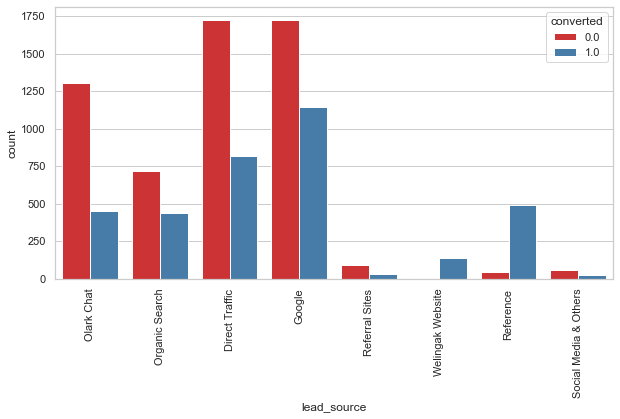

In [32]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
s1=sns.countplot(df1.lead_source, hue=df1.converted, palette="Set1")
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

lead origin definitely has a lot of stories to tell. We shall look into this in much detail what cleaning the entire data set

Lets start handling the columns with higher missing values. 

In [33]:
df1["country"].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Kuwait                     4
Germany                    4
South Africa               4
Canada                     4
Sweden                     3
Philippines                2
Asia/Pacific Region        2
Ghana                      2
China                      2
Uganda                     2
Belgium                    2
Netherlands                2
Bangladesh                 2
Italy                      2
Liberia                    1
Tanzania                   1
Malaysia                   1
Indonesia                  1
Kenya                      1
Vietnam                    1
Denmark       

In [34]:
df1["country"].isnull().sum()

2461

In [35]:
gulf_var= ['United Arab Emirates','Saudi Arabia','Qatar','Bahrain','Oman','Kuwait']

for i in range(len(df1)):
    if df1.country[i] in gulf_var:
        df1.country[i] = 'gulf_country'
        
european_var = ['United Kingdom','France','Germany','Sweden','Belgium','Netherlands','Switzerland','Denmark']

for i in range(len(df1)):
    if df1.country[i] in european_var:
        df1.country[i] = 'european_country'
        
other_var=list(df1.country.value_counts()[df1.country.value_counts() < 34].index)
for i in range(len(df1)):
    if df1.country[i] in other_var:
        df1.country[i] = 'other_country'

In [36]:
df1["country"].value_counts(dropna=False)

India               6492
NaN                 2461
gulf_country         101
other_country         83
United States         69
european_country      34
Name: country, dtype: int64

##### As a normal treatment, we impute the missing data with most occuring country (India), since we have data of city available, let's cross verify that

In [37]:
df1.country[df1.city=='Mumbai'].value_counts()

India               2918
gulf_country          32
United States         30
other_country         20
european_country      11
Name: country, dtype: int64

In [38]:
df1.country[df1.city=='Other Cities of Maharashtra'].value_counts()

India               391
gulf_country          7
other_country         6
european_country      5
United States         5
Name: country, dtype: int64

We can see there are a few discrepanies in our data. A few customers have entered wrong cities, eg. customer from Europian country has put city as Mumbai. Therefore we shall hold the country variable as it is for now and check the city variable.

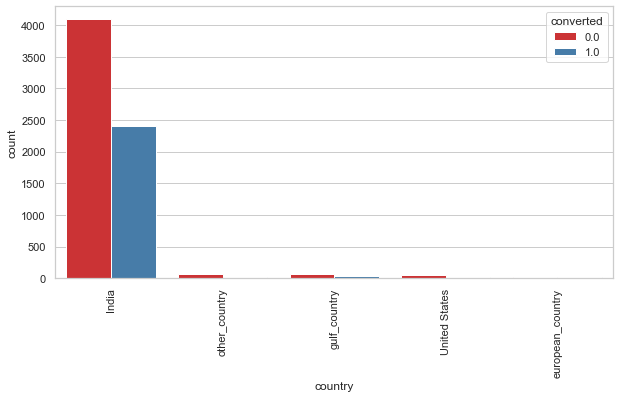

In [39]:
plt.figure(figsize=(10,5))
s2=sns.countplot(df1.country, hue=df1.converted, palette="Set1")
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
plt.show()

In [40]:
df1["city"].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: city, dtype: int64

In [41]:
(3222+752)/len(df)*100

43.00865800865801

To ease the model building process, we can further club given catagories into 3 basic catagories as,'Mumbai','Other cities', and 'Other metro cities', wherein, **Other cities** will include 'Thane & Outskirts', 'Other Cities of Maharashtra', 'Tier II Cities'

In [42]:
df1.city[df1.city=='Thane & Outskirts']='Other Cities'
df1.city[df1.city=='Other Cities of Maharashtra']='Other Cities'
df1.city[df1.city=='Tier II Cities']='Other Cities'

In [43]:
#looking for missing values
df1["city"].isnull().sum()

3669

We still need to tackle the null values. Let's try a different approach here. 

The hurdle in imputing these missing values is that we cannot blindly alot them a category based on highest occuring city. Since we have a column named 'country' we will need to transfer the cities to categories on conditional bases. 
Hence, the missing values having Countries other than India can be transfered to 'Other Cities' and the remaining can be aloted 'Mumbai' as Mumbai is the most occuring city. 

Inorder to tackle the complexity of these 2 variables. We shall now change the null values to a string **'Unknown'** 

In [44]:
df1.city[df1.city.isna()]='Unknown'

In [45]:
df1.city.value_counts(dropna=False)

Unknown               3669
Mumbai                3222
Other Cities          1969
Other Metro Cities     380
Name: city, dtype: int64

In [46]:
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='India':
        df1.city[i]='Mumbai'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='gulf_country':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='United States':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='european_country':
        df1.city[i]='Other Cities'
        
for i in range(len(df1)):
    if df1.city[i]=="Unknown" and df1.country[i]=='other_country':
        df1.city[i]='Other Cities'

In [47]:
df1.city.value_counts(dropna=False)

Mumbai                4776
Unknown               2055
Other Cities          2029
Other Metro Cities     380
Name: city, dtype: int64

We have successfuly sorted the cities based on the available country information. We are still left with another 2097 Unknown/Null values. This we will replace it with Mumbai as Mumbai is the most frequently occuring City in this dataset. 

In [48]:
df1.city[df1.city=='Unknown']= 'Mumbai'

In [49]:
df1.city.value_counts()

Mumbai                6831
Other Cities          2029
Other Metro Cities     380
Name: city, dtype: int64

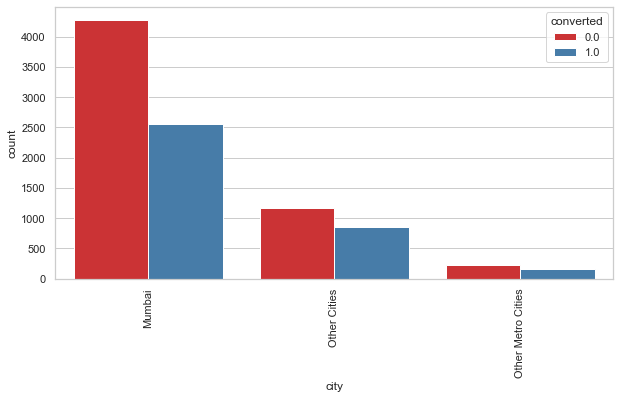

In [50]:
plt.figure(figsize=(10,5))
s3=sns.countplot(df1.city, hue=df1.converted, palette="Set1")
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
plt.show()

The City variable looks better and hopefully will help in better model building process. 

Going back to the country variable, which can not be tweaked like the city variable. The only option would be to change the entire missing value to the most recuring country which happens ot be India. 
India already has '6492' entries adding the missing '2461' which makes India have 97% of the values. By doing so we will be further creating an unbalanced data which is not going to help in our model building. 
Hence; as country and city variable are both associated with geographical location of the candidate, we can drop country column and retain city column for our further analysis. 

In [51]:
df1.drop(["country"],axis='columns',inplace=True)

In [52]:
df1.shape

(9240, 24)

In [53]:
df1["specialization"].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: specialization, dtype: int64

In [54]:
df1["specialization"].isnull().sum()

3380

This is good indicator,also other looks well balanced. There is a possibility that, person did not find his/her specialization in the list given below causing the missing values. We can't assign them to most occured one here and there are no connecting  data from which we can derive some idea as to what would their specization be.
Hence, let's create a catagory 'other' and put them in it.

In [55]:
df1.specialization.replace(np.nan,'Other',inplace=True)

In [56]:
df1.specialization.value_counts() 

Other                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: specialization, dtype: int64

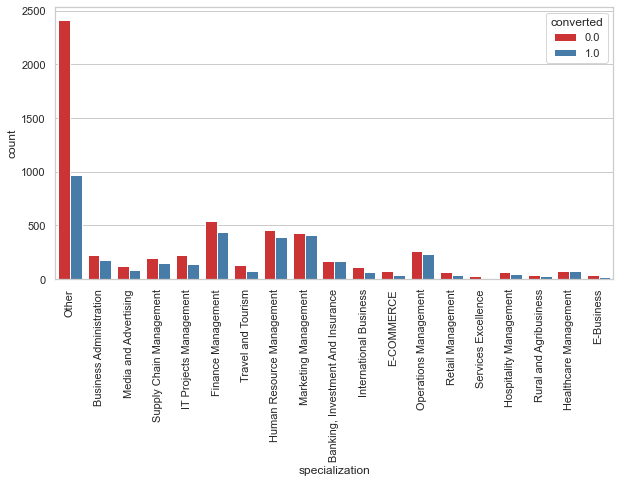

In [57]:
plt.figure(figsize=(10,5))
s4=sns.countplot(df1.specialization, hue=df1.converted, palette="Set1")
s4.set_xticklabels(s4.get_xticklabels(),rotation=90)
plt.show()

In [58]:
df1["what_is_your_current_occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

In [59]:
df1["what_is_your_current_occupation"].isnull().sum()

2690

Here, there is an option of 'other', still customer haven't chosen that option, may be they were not willing or interested to disclose it.
As of now, as 60.0% of the customers are unemployed, we can impute them to 'unemployed',But since this company focuses on providing higher education, so a person could be either unemployed or working professional or student(most likely final year)
Let's just take these 3 catagories and impute them in random.

In [60]:
import random

random_occupation = ['Unemployed','Working Professional','Student']
df1.what_is_your_current_occupation.replace(np.nan,'NaN',inplace=True)
for i in range(len(df1)):
    if df1.what_is_your_current_occupation[i]=='NaN':
        var = random.choice(random_occupation)
        df1.what_is_your_current_occupation[i] = df1.what_is_your_current_occupation[i].replace(df1.what_is_your_current_occupation[i], var)

In [61]:
df1.what_is_your_current_occupation.value_counts()

Unemployed              6490
Working Professional    1602
Student                 1114
Other                     16
Housewife                 10
Businessman                8
Name: what_is_your_current_occupation, dtype: int64

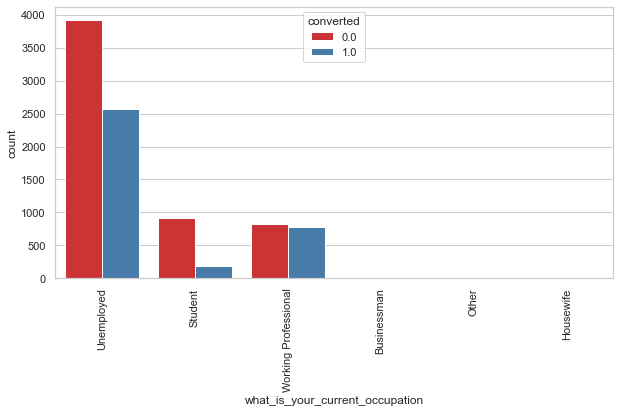

In [62]:
plt.figure(figsize=(10,5))
s5=sns.countplot(df1.what_is_your_current_occupation, hue=df1.converted, palette="Set1")
s5.set_xticklabels(s5.get_xticklabels(),rotation=90)
plt.show()

In [63]:
df1["what_matters_most_to_you_in_choosing_a_course"].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: what_matters_most_to_you_in_choosing_a_course, dtype: int64

This is once again a highly skewed data 'better career..' has 70% of the values and others have total entries 3 and nearly 2709 null values. if we impute the missing values with the most occuring value this data is not of any great use for the model building process as this will not serve as an indicator variable to identify the hot leads. 

Therefore this column can dropped right away without carrying it further.

In [64]:
df1.drop("what_matters_most_to_you_in_choosing_a_course", axis='columns',inplace=True)

#### Some other variables that does not have null values but might need to be handled. 

In [65]:
print(df1.search.value_counts(dropna=False))
print(df1.magazine.value_counts(dropna=False))
print(df1.x_education_forums.value_counts(dropna=False))
print(df1.newspaper.value_counts(dropna=False))
print(df1.newspaper_article.value_counts(dropna=False))
print(df1.digital_advertisement.value_counts(dropna=False))
print(df1.through_recommendations.value_counts(dropna=False))

#Some other columns deviced to initiate communication with the customer.

print(df1.receive_more_updates_about_our_courses.value_counts(dropna=False))
print(df1.update_me_on_supply_chain_content.value_counts(dropna=False))
print(df1.get_updates_on_dm_content.value_counts(dropna=False))
print(df1.i_agree_to_pay_the_amount_through_cheque.value_counts(dropna=False))


No     9226
Yes      14
Name: search, dtype: int64
No    9240
Name: magazine, dtype: int64
No     9239
Yes       1
Name: x_education_forums, dtype: int64
No     9239
Yes       1
Name: newspaper, dtype: int64
No     9238
Yes       2
Name: newspaper_article, dtype: int64
No     9236
Yes       4
Name: digital_advertisement, dtype: int64
No     9233
Yes       7
Name: through_recommendations, dtype: int64
No    9240
Name: receive_more_updates_about_our_courses, dtype: int64
No    9240
Name: update_me_on_supply_chain_content, dtype: int64
No    9240
Name: get_updates_on_dm_content, dtype: int64
No    9240
Name: i_agree_to_pay_the_amount_through_cheque, dtype: int64


1. All of them no null values here
2. MOst of them having only NO as response.
3. Strangely nobody seems to have seen any ad in search, magazine, newspaper or newspaper article, digital_advertising there is no point in keeping these columns.
4. Though we have many leads through referrence, the column through_recommendations seems to have very few 'Yes' which is unsual to use.
5. Most of the columns seemed extremely skewed in information. Hence, it is best to drop them all. 

In [66]:
#a free copy of mastering the interview
df1.a_free_copy_of_mastering_the_interview.value_counts(normalize=True,dropna=False)*100

No     68.744589
Yes    31.255411
Name: a_free_copy_of_mastering_the_interview, dtype: float64

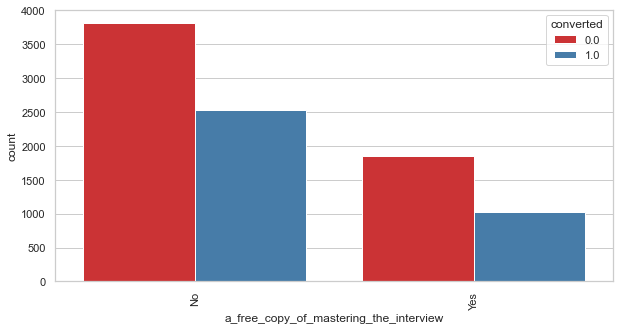

In [67]:
plt.figure(figsize=(10,5))
s6=sns.countplot(df1.a_free_copy_of_mastering_the_interview, hue=df1.converted, palette="Set1")
s6.set_xticklabels(s6.get_xticklabels(),rotation=90)
plt.show()

#### A good 68-32 separation with no null values, this may be one of the deciding factor in our model. Despite of havig a 68% NO selected, a good proportion has been converted and definitely the non-converter customers who have 

In [68]:
#dropping all of the above columns that seem irrelevant from the data perspective. 

df1.drop(['search','magazine', 'x_education_forums','newspaper','newspaper_article','digital_advertisement','through_recommendations', 'receive_more_updates_about_our_courses', 'update_me_on_supply_chain_content', 'get_updates_on_dm_content', 'i_agree_to_pay_the_amount_through_cheque'],axis='columns',inplace=True)



In [69]:
print(df1.lead_origin.value_counts(dropna = False))

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: lead_origin, dtype: int64


In [70]:
#quick add form has only 1 entry, 
#lets impute it with most occuring one

df1.lead_origin[df.lead_origin=='Quick Add Form']='Landing Page Submission'
df1.lead_origin.value_counts(dropna = False)

Landing Page Submission    4887
API                        3580
Lead Add Form               718
Lead Import                  55
Name: lead_origin, dtype: int64

In [71]:
#do not mail 

df1.do_not_email.value_counts() #seems fair to me

No     8506
Yes     734
Name: do_not_email, dtype: int64

In [72]:
#do not call 

df1.do_not_call.value_counts() # this is highly imbalanced column, lets just drop this column as it has 99%+ same value

No     9238
Yes       2
Name: do_not_call, dtype: int64

In [73]:
#Those who say do not call or mail have spent good time on the website might have a high conversion rate
df1.drop('do_not_call', axis='columns',inplace=True)

In [74]:
'do_not_call' in df1.columns #cross check

False

In [75]:
df1.shape

(9240, 11)

In [76]:
df1.head(10)

lead_origin     lead_source do_not_email  converted  \
0                      API      Olark Chat           No        0.0   
1                      API  Organic Search           No        0.0   
2  Landing Page Submission  Direct Traffic           No        1.0   
3  Landing Page Submission  Direct Traffic           No        0.0   
4  Landing Page Submission          Google           No        1.0   
5                      API      Olark Chat           No        0.0   
6  Landing Page Submission          Google           No        1.0   
7                      API      Olark Chat           No        0.0   
8  Landing Page Submission  Direct Traffic           No        0.0   
9                      API          Google           No        0.0   

   totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   
5          0.0                          0.0                   0.0   
6          2.0                       1640.0                   2.0   
7          0.0                          0.0                   0.0   
8          2.0                         71.0                   2.0   
9          4.0                         58.0                   4.0   

            specialization what_is_your_current_occupation          city  \
0                    Other                      Unemployed        Mumbai   
1                    Other                      Unemployed        Mumbai   
2  Business Administration                         Student        Mumbai   
3    Media and Advertising                      Unemployed        Mumbai   
4                    Other                      Unemployed        Mumbai   
5                    Other                      Unemployed        Mumbai   
6  Supply Chain Management                      Unemployed        Mumbai   
7                    Other            Working Professional        Mumbai   
8   IT Projects Management                      Unemployed  Other Cities   
9       Finance Management                      Unemployed        Mumbai   

  a_free_copy_of_mastering_the_interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No  
5                                     No  
6                                     No  
7                                     No  
8                                    Yes  
9                                     No

total visits

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: totalvisits, dtype: float64


<AxesSubplot:>

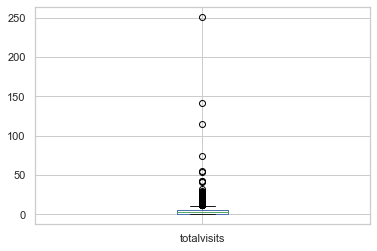

In [77]:
print (df1.totalvisits.describe())
df1.totalvisits.plot.box()

Totalvisits seems to have too many outliers making the data extremely skewed. Every person has different method intaking a decision some of them quickly decide and some take months, years and a lot of research. Totalvisits is one such column where a few have visited the website several times. the average visit by the customers is less than 5times. Therefore considering a few exceptions, we will keep totalvisits bench mark less than 30 and delete those above 30 visits.  

In [78]:
df1 = df1[~(df1.totalvisits > 30)]

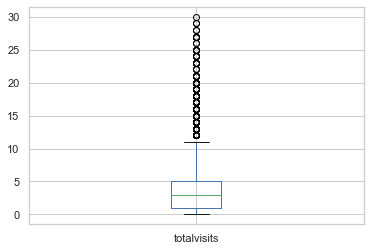

In [79]:
df1.totalvisits.plot.box(); #looks consistent, moving on to next 

In [80]:
df1.totalvisits.isnull().sum()

137

There are 137 records which have null values. This is a numeric column, let's impute these records with median

In [81]:
df1.totalvisits.replace(np.nan,df1.totalvisits.median(),inplace=True)
df1.totalvisits.isnull().sum()

0

In [82]:
df1.totalvisits.describe()

count    9230.000000
mean        3.350488
std         3.394736
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        30.000000
Name: totalvisits, dtype: float64

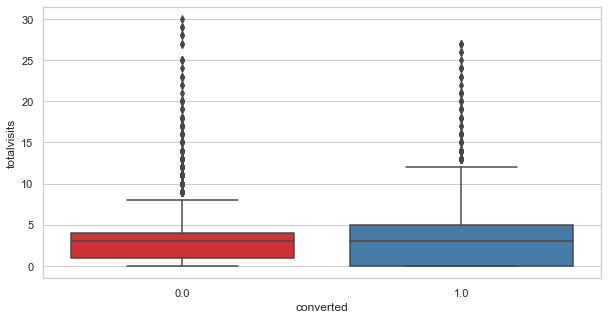

In [83]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['totalvisits'], palette="Set1")
plt.show()

In [84]:
df1.shape

(9230, 11)

total time spent on website

In [85]:
df1.total_time_spent_on_website.describe(percentiles=[.25, .5, .75,.95,.99]) #does not look like any issue here, next

count    9230.000000
mean      487.650379
std       548.080646
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
95%      1562.000000
99%      1840.710000
max      2272.000000
Name: total_time_spent_on_website, dtype: float64

In [86]:
df1.total_time_spent_on_website.isnull().sum() #has 0 null values, great, let's move to next 

0

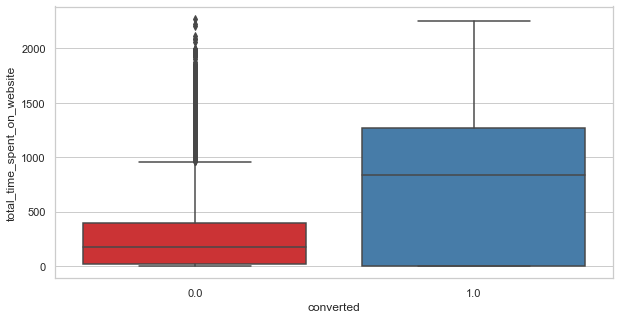

In [87]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['total_time_spent_on_website'],palette="Set1")
plt.show()

This clearly states that those who spend a considerable amount of time on the website can be our hot leads.

page views per visit

<AxesSubplot:>

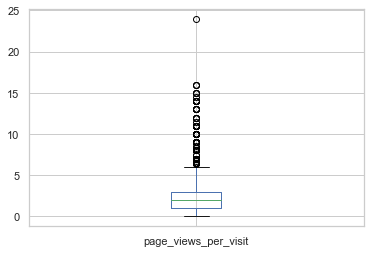

In [88]:
df1.page_views_per_visit.plot.box()

looks good enough too, that furthest guy has actually been converted and is a genuine entry,
#but not good for generalizing as it is just 1 entry

In [89]:
df1.page_views_per_visit.describe(percentiles=[.95,.97,.99])

count    9093.000000
mean        2.354544
std         2.086626
min         0.000000
50%         2.000000
95%         6.000000
97%         7.000000
99%         9.000000
max        24.000000
Name: page_views_per_visit, dtype: float64

In [90]:
df1.page_views_per_visit[df1.page_views_per_visit > 9].shape #lets keep only those records which are under 99%

(73,)

In [91]:
df1.page_views_per_visit=df1.page_views_per_visit[df1.page_views_per_visit < 9]

In [92]:
df1.page_views_per_visit.describe(percentiles=[.95,.97,.99])

#great, let's check null values

count    8975.000000
mean        2.243440
std         1.841086
min         0.000000
50%         2.000000
95%         6.000000
97%         6.000000
99%         7.130000
max         8.500000
Name: page_views_per_visit, dtype: float64

In [93]:
df1.page_views_per_visit.isnull().sum()

#just 255 records, 2.5% let's impute them with median value, as mean and median are closer

255

In [94]:
df1.page_views_per_visit.replace(np.nan,df1.page_views_per_visit.median(),inplace=True)
df1.shape

(9230, 11)

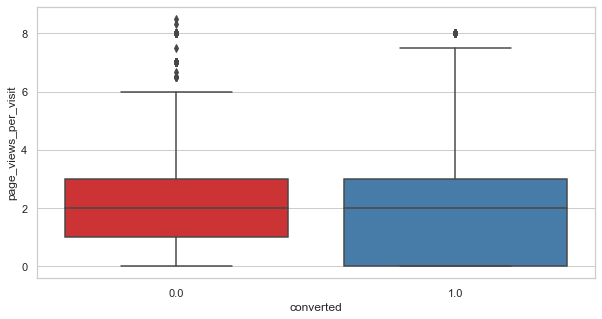

In [95]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df1.converted, y=df1['page_views_per_visit'],palette="Set1")
plt.show()

In [96]:
#converted

df1.converted.value_counts()

#that is our target variable, having good 60-40 balance, we might build great model, yeeyyy!!

0.0    5670
1.0    3560
Name: converted, dtype: int64

In [97]:
df1.converted=df1.converted.astype(int) #just for the sake of algorithm
sum(df1['converted'])/len(df1['converted'].index)*100 #checking the percentage of converted customers in our existing dataset.

38.569880823401945

##### These were all the imputations that needed to be done, going column by column, let's check our data 

In [98]:
# check the columns 
df1.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'specialization', 'what_is_your_current_occupation', 'city',
       'a_free_copy_of_mastering_the_interview'],
      dtype='object')

In [99]:
df1.isnull().sum()

lead_origin                                0
lead_source                               36
do_not_email                               0
converted                                  0
totalvisits                                0
total_time_spent_on_website                0
page_views_per_visit                       0
specialization                             0
what_is_your_current_occupation            0
city                                       0
a_free_copy_of_mastering_the_interview     0
dtype: int64

In [100]:
df1.dropna(inplace=True)

In [101]:
df1.isnull().sum()

lead_origin                               0
lead_source                               0
do_not_email                              0
converted                                 0
totalvisits                               0
total_time_spent_on_website               0
page_views_per_visit                      0
specialization                            0
what_is_your_current_occupation           0
city                                      0
a_free_copy_of_mastering_the_interview    0
dtype: int64

In [102]:
df1.reset_index(drop=True,inplace=True)
df1.shape

(9194, 11)

## Data visualization

### Visualizing Numerical variable

Checking correlation between the numerical variables presnet in the dataset.

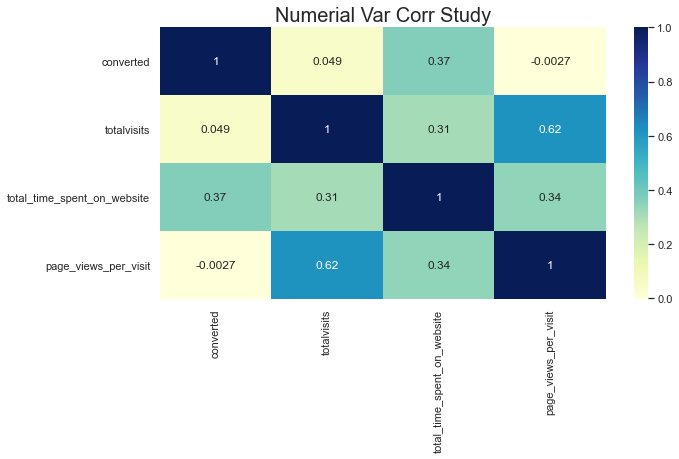

In [103]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
plt.title("Numerial Var Corr Study", fontsize =20)
plt.show()

#### Observation about the numerical variable

1. totalvisits and page_views_per_visit have multicolinearity. As we move ahead we can decide if any of them needs to dropped.
2. While totalvisits is positively correlated to converted. The page_views_per_visit variable has a negative correlation with the converted.

### Univariate analysis

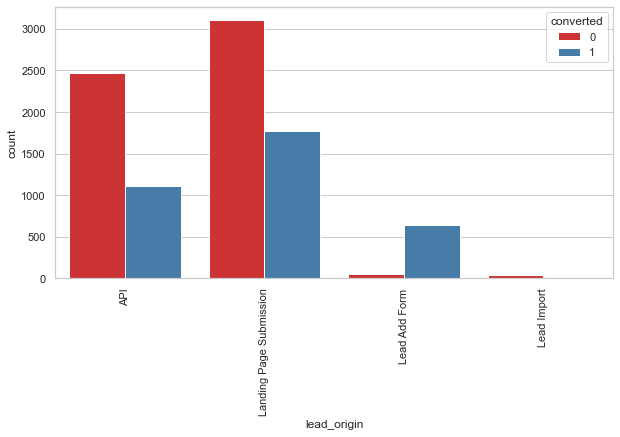

In [104]:
# Lead origin
plt.figure(figsize=(10,5))
s8=sns.countplot(df1.lead_origin, hue=df1.converted, palette="Set1")
s8.set_xticklabels(s8.get_xticklabels(),rotation=90)
plt.show()

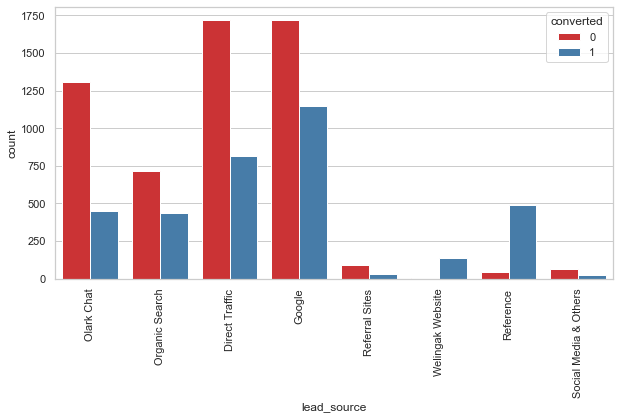

In [105]:
#lead source
plt.figure(figsize=(10,5))
s9=sns.countplot(df1.lead_source, hue=df1.converted, palette="Set1")
s9.set_xticklabels(s9.get_xticklabels(),rotation=90)
plt.show()

In [106]:
df1.head(10)

lead_origin     lead_source do_not_email  converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   
5                      API      Olark Chat           No          0   
6  Landing Page Submission          Google           No          1   
7                      API      Olark Chat           No          0   
8  Landing Page Submission  Direct Traffic           No          0   
9                      API          Google           No          0   

   totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   
5          0.0                          0.0                   0.0   
6          2.0                       1640.0                   2.0   
7          0.0                          0.0                   0.0   
8          2.0                         71.0                   2.0   
9          4.0                         58.0                   4.0   

            specialization what_is_your_current_occupation          city  \
0                    Other                      Unemployed        Mumbai   
1                    Other                      Unemployed        Mumbai   
2  Business Administration                         Student        Mumbai   
3    Media and Advertising                      Unemployed        Mumbai   
4                    Other                      Unemployed        Mumbai   
5                    Other                      Unemployed        Mumbai   
6  Supply Chain Management                      Unemployed        Mumbai   
7                    Other            Working Professional        Mumbai   
8   IT Projects Management                      Unemployed  Other Cities   
9       Finance Management                      Unemployed        Mumbai   

  a_free_copy_of_mastering_the_interview  
0                                     No  
1                                     No  
2                                    Yes  
3                                     No  
4                                     No  
5                                     No  
6                                     No  
7                                     No  
8                                    Yes  
9                                     No

### Data Preparation

#### Creating Dummy Variable

In [107]:
col_dummy = df1.select_dtypes(include=['object']).columns
col_dummy

Index(['lead_origin', 'lead_source', 'do_not_email', 'specialization',
       'what_is_your_current_occupation', 'city',
       'a_free_copy_of_mastering_the_interview'],
      dtype='object')

#### Converting some binary variables (Yes/No) to 0/1

In [108]:
varlist = ['a_free_copy_of_mastering_the_interview','do_not_email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the var list
df1[varlist] = df1[varlist].apply(binary_map)

In [109]:
#Specialization
dummy = pd.get_dummies(df1['specialization'], prefix  = 'specialization')
dummy = dummy.drop(['specialization_Other'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#what_is_your_current_occupation
dummy = pd.get_dummies(df1['what_is_your_current_occupation'], prefix  = 'what_is_your_current_occupation')
dummy = dummy.drop(['what_is_your_current_occupation_Other'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#city
dummy = pd.get_dummies(df1['city'], prefix  = 'city')
dummy = dummy.drop(['city_Other Metro Cities'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#lead_origin
dummy = pd.get_dummies(df1['lead_origin'], prefix  = 'lead_origin')
dummy = dummy.drop(['lead_origin_Lead Import'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

#lead_source
dummy = pd.get_dummies(df1['lead_source'], prefix  = 'lead_source')
dummy = dummy.drop(['lead_source_Social Media & Others'], 1)
df1 = pd.concat([df1, dummy], axis = 1)

In [110]:
df1.head()

lead_origin     lead_source  do_not_email  converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   totalvisits  total_time_spent_on_website  page_views_per_visit  \
0          0.0                          0.0                   0.0   
1          5.0                        674.0                   2.5   
2          2.0                       1532.0                   2.0   
3          1.0                        305.0                   1.0   
4          2.0                       1428.0                   1.0   

            specialization what_is_your_current_occupation    city  \
0                    Other                      Unemployed  Mumbai   
1                    Other                      Unemployed  Mumbai   
2  Business Administration                         Student  Mumbai   
3    Media and Advertising                      Unemployed  Mumbai   
4                    Other                      Unemployed  Mumbai   

   a_free_copy_of_mastering_the_interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   specialization_Business Administration  specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   specialization_E-COMMERCE  specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   specialization_International Business  specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   

In [111]:
df1.shape

(9194, 46)

Lets drop the columns for which dummy variables have already been created. 

In [112]:
df1.drop(['lead_origin', 'lead_source', 'specialization',
       'what_is_your_current_occupation', 'city'],axis='columns',inplace=True)

In [113]:
df1

do_not_email  converted  totalvisits  total_time_spent_on_website  \
0                0          0          0.0                          0.0   
1                0          0          5.0                        674.0   
2                0          1          2.0                       1532.0   
3                0          0          1.0                        305.0   
4                0          1          2.0                       1428.0   
...            ...        ...          ...                          ...   
9189             1          1          8.0                       1845.0   
9190             0          0          2.0                        238.0   
9191             1          0          2.0                        199.0   
9192             0          1          3.0                        499.0   
9193             0          1          6.0                       1279.0   

      page_views_per_visit  a_free_copy_of_mastering_the_interview  \
0                     0.00                                       0   
1                     2.50                                       0   
2                     2.00                                       1   
3                     1.00                                       0   
4                     1.00                                       0   
...                    ...                                     ...   
9189                  2.67                                       0   
9190                  2.00                                       1   
9191                  2.00                                       1   
9192                  3.00                                       0   
9193                  3.00                                       1   

      specialization_Banking, Investment And Insurance  \
0                                                    0   
1                                                    0   
2                                                    0   
3                                                    0   
4                                                    0   
...                                                ...   
9189                                                 0   
9190                                                 0   
9191                                                 0   
9192                                                 0   
9193                                                 0   

      specialization_Business Administration  specialization_E-Business  \
0                                          0                          0   
1                                          0                          0   
2                                          1                          0   
3                                          0                          0   
4                                          0                          0   
...                                      ...                        ...   
9189                                       0                          0   
9190                                       0                          0   
9191                                       1                          0   
9192                                       0                          0   
9193                                       0                          0   

      specialization_E-COMMERCE  specialization_Finance Management  \
0                             0                                  0   
1                             0                                  0   
2                             0                                  0   
3                             0                                  0   
4                             0                                  0   
...                         ...                                ...   
9189                          0                                  0   
9190                          0                                  0   
9191                          0     

In [114]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 41 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   do_not_email                                          9194 non-null   int64  
 1   converted                                             9194 non-null   int32  
 2   totalvisits                                           9194 non-null   float64
 3   total_time_spent_on_website                           9194 non-null   float64
 4   page_views_per_visit                                  9194 non-null   float64
 5   a_free_copy_of_mastering_the_interview                9194 non-null   int64  
 6   specialization_Banking, Investment And Insurance      9194 non-null   uint8  
 7   specialization_Business Administration                9194 non-null   uint8  
 8   specialization_E-Business                             9194

### Train & test split dataset

In [115]:
# Putting feature variable to X & target variable to y

X = df1.drop(['converted'], axis=1)
y = df1['converted']
X.head()

do_not_email  totalvisits  total_time_spent_on_website  \
0             0          0.0                          0.0   
1             0          5.0                        674.0   
2             0          2.0                       1532.0   
3             0          1.0                        305.0   
4             0          2.0                       1428.0   

   page_views_per_visit  a_free_copy_of_mastering_the_interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   specialization_Business Administration  specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   specialization_E-COMMERCE  specialization_Finance Management  \
0                          0                                  0   
1                          0                                  0   
2                          0                                  0   
3                          0                                  0   
4                          0                                  0   

   specialization_Healthcare Management  \
0                                     0   
1                                     0   
2                                     0   
3                                     0   
4                                     0   

   specialization_Hospitality Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   specialization_Human Resource Management  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   specialization_IT Projects Management  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   specialization_International Business  specialization_Marketing Management  \
0                                      0                                    0   
1                                      0                                    0   
2                                      0                                    0   
3                                      0                                    0   
4                                      0                                    0   

   specialization_Media and Advertising  specialization_Operations Management  \
0                                     0                                     0   
1                                     0                                     0   
2                                     0                                     0   
3                                     1                                     0   
4                                     0                                     0   

   specialization_Re

In [116]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [117]:
scaler = StandardScaler()

X_train[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]] = scaler.fit_transform(X_train[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]])

X_train.head()

do_not_email  totalvisits  total_time_spent_on_website  \
8287             1    -0.697804                    -0.606735   
504              0     0.183409                     2.105098   
4612             0    -0.404066                     2.278700   
5624             0    -0.697804                     0.014575   
1835             0    -0.991542                    -0.891806   

      page_views_per_visit  a_free_copy_of_mastering_the_interview  \
8287             -0.691804                                       1   
504               0.966835                                       0   
4612             -0.138924                                       1   
5624             -0.691804                                       1   
1835             -1.244684                                       0   

      specialization_Banking, Investment And Insurance  \
8287                                                 0   
504                                                  0   
4612                                                 1   
5624                                                 0   
1835                                                 0   

      specialization_Business Administration  specialization_E-Business  \
8287                                       0                          0   
504                                        0                          0   
4612                                       0                          0   
5624                                       0                          0   
1835                                       0                          0   

      specialization_E-COMMERCE  specialization_Finance Management  \
8287                          0                                  1   
504                           0                                  0   
4612                          0                                  0   
5624                          0                                  0   
1835                          0                                  0   

      specialization_Healthcare Management  \
8287                                     0   
504                                      0   
4612                                     0   
5624                                     0   
1835                                     0   

      specialization_Hospitality Management  \
8287                                      0   
504                                       1   
4612                                      0   
5624                                      0   
1835                                      0   

      specialization_Human Resource Management  \
8287                                         0   
504                                          0   
4612                                         0   
5624                                         0   
1835                                         0   

      specialization_IT Projects Management  \
8287                                      0   
504                                       0   
4612                                      0   
5624                                      1   
1835                                      0   

      specialization_International Business  \
8287                                      0   
504                                       0   
4612                                      0   
5624                                      0   
1835                                      0   

      specialization_Marketing Management  \
8287                                    0   
504                                     0   
4612                                    0   
5624                                    0   
1835                                    0   

      specialization_Media and Advertising  \
8287                                     0   
504                                      0   
4612                                     0   
5624                                     0   
1835                                     0   

    

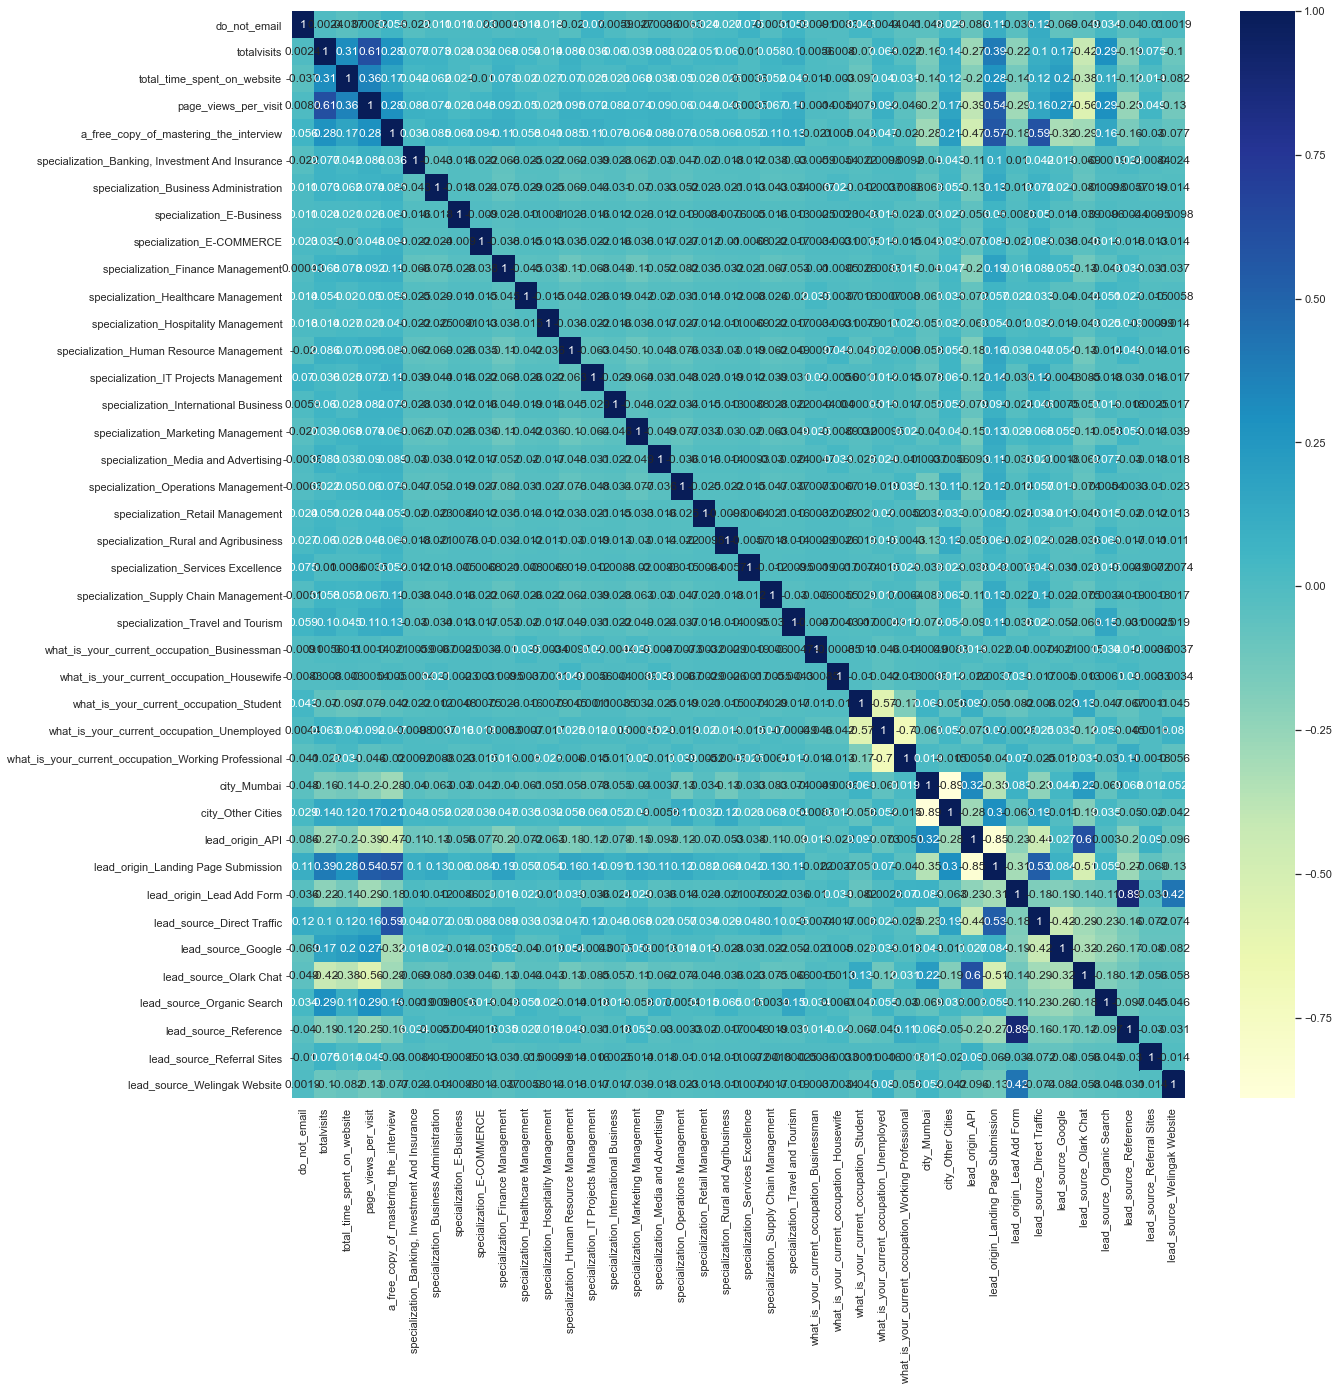

In [118]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

Since the number of variables are too high, the heatmap appears extremely cluttered making it very difficult to identify the highly correlated variables. therefor lets go ahead and build our 1st model study the summary and check the RFE.

## Model Building 

In [119]:
import statsmodels.api as sm

In [120]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm1.fit().summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3057.9
Date:                Wed, 19 Jan 2022   Deviance:                       6115.8
Time:                        23:30:48   Pearson chi2:                 6.78e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

It can be seen that there are several p-values that are insignificant but before we decide to drop any predictor variable lets check the VIF(variance_inflation_factor)

### Checking VIF

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
31                lead_origin_Landing Page Submission  350.79
30                                    lead_origin_API  251.29
34                                 lead_source_Google  160.70
33                         lead_source_Direct Traffic  140.39
32                          lead_origin_Lead Add Form  110.34
26         what_is_your_current_occupation_Unemployed  107.70
35                             lead_source_Olark Chat   95.80
37                              lead_source_Reference   80.47
36                         lead_source_Organic Search   65.29
27  what_is_your_current_occupation_Working Profes...   28.63
25            what_is_your_current_occupation_Student   20.04
39                       lead_source_Welingak Website   19.96
28                                        city_Mumbai   19.28
38                         lead_source_Referral Sites    7.84
29                                  city_Other Cities    6.13
4              a_free_copy_of_mastering_the_interview    3.20
3                                page_views_per_visit    2.43
9                   specialization_Finance Management    2.18
12           specialization_Human Resource Management    2.02
15                specialization_Marketing Management    1.96
1                                         totalvisits    1.76
17               specialization_Operations Management    1.60
6              specialization_Business Administration    1.54
13              specialization_IT Projects Management    1.47
21             specialization_Supply Chain Management    1.45
5    specialization_Banking, Investment And Insurance    1.41
22                  specialization_Travel and Tourism    1.33
16               specialization_Media and Advertising    1.29
2                         total_time_spent_on_website    1.28
14              specialization_International Business    1.25
10               specialization_Healthcare Management    1.20
8                           specialization_E-COMMERCE    1.16
23        what_is_your_current_occupation_Businessman    1.15
0                                        do_not_email    1.14
19              specialization_Rural and Agribusiness    1.14
18                   specialization_Retail Management    1.14
11              specialization_Hospitality Management    1.14
24          what_is_your_current_occupation_Housewife    1.13
7                           specialization_E-Business    1.09
20                 specialization_Services Excellence    1.05

### Feature selection using RFE

In [123]:
logreg = LogisticRegression()

rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('do_not_email', True, 1),
 ('totalvisits', False, 16),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 17),
 ('a_free_copy_of_mastering_the_interview', False, 12),
 ('specialization_Banking, Investment And Insurance', True, 1),
 ('specialization_Business Administration', True, 1),
 ('specialization_E-Business', True, 1),
 ('specialization_E-COMMERCE', True, 1),
 ('specialization_Finance Management', True, 1),
 ('specialization_Healthcare Management', True, 1),
 ('specialization_Hospitality Management', False, 7),
 ('specialization_Human Resource Management', True, 1),
 ('specialization_IT Projects Management', True, 1),
 ('specialization_International Business', False, 4),
 ('specialization_Marketing Management', True, 1),
 ('specialization_Media and Advertising', True, 1),
 ('specialization_Operations Management', True, 1),
 ('specialization_Retail Management', False, 6),
 ('specialization_Rural and Agribusiness', False, 2),
 ('specialization_Services Exc

In [124]:
X_train.columns[rfe.support_]

Index(['do_not_email', 'total_time_spent_on_website',
       'specialization_Banking, Investment And Insurance',
       'specialization_Business Administration', 'specialization_E-Business',
       'specialization_E-COMMERCE', 'specialization_Finance Management',
       'specialization_Healthcare Management',
       'specialization_Human Resource Management',
       'specialization_IT Projects Management',
       'specialization_Marketing Management',
       'specialization_Media and Advertising',
       'specialization_Operations Management',
       'specialization_Services Excellence',
       'specialization_Supply Chain Management',
       'what_is_your_current_occupation_Housewife',
       'what_is_your_current_occupation_Student',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website'],
      dtype='object')

In [125]:
want_col = X_train.columns[rfe.support_]

In [126]:
drop_col = X_train.columns[~rfe.support_]

In [127]:
X_train_new = X_train[want_col]
X_train_new.shape

(6435, 20)

### Model 2 

In [128]:
X_train_sm = sm.add_constant(X_train_new)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm2.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3135.7
Date:                Wed, 19 Jan 2022   Deviance:                       6271.3
Time:                        23:30:50   Pearson chi2:                 6.67e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [129]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
17               lead_origin_Landing Page Submission  3.78
6                  specialization_Finance Management  1.53
18                         lead_origin_Lead Add Form  1.51
8           specialization_Human Resource Management  1.45
10               specialization_Marketing Management  1.42
19                      lead_source_Welingak Website  1.27
12              specialization_Operations Management  1.25
3             specialization_Business Administration  1.24
9              specialization_IT Projects Management  1.21
14            specialization_Supply Chain Management  1.20
2   specialization_Banking, Investment And Insurance  1.18
11              specialization_Media and Advertising  1.13
0                                       do_not_email  1.11
1                        total_time_spent_on_website  1.09
7               specialization_Healthcare Management  1.08
16           what_is_your_current_occupation_Student  1.08
5                          specialization_E-COMMERCE  1.07
4                          specialization_E-Business  1.04
13                specialization_Services Excellence  1.03
15         what_is_your_current_occupation_Housewife  1.01

The p-value and VIF to most of the variables are looking good except for the p-value of what_is_your_current_occupation_Housewife which is 0.999. Lets drop that from the feature variable and see the new model. 

In [130]:
X_train_new.drop('what_is_your_current_occupation_Housewife', 
                 axis = 'columns',inplace=True)

### Final Model 3

In [131]:
X_train_sm = sm.add_constant(X_train_new)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
print (logm3.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              converted   No. Observations:                 6435
Model:                            GLM   Df Residuals:                     6415
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3139.1
Date:                Wed, 19 Jan 2022   Deviance:                       6278.2
Time:                        23:30:50   Pearson chi2:                 6.68e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

The p-values of all teh variable looks good. Now lets check the VIF for teh same model. 

In [132]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
16               lead_origin_Landing Page Submission  3.78
6                  specialization_Finance Management  1.53
17                         lead_origin_Lead Add Form  1.51
8           specialization_Human Resource Management  1.45
10               specialization_Marketing Management  1.42
18                      lead_source_Welingak Website  1.27
12              specialization_Operations Management  1.25
3             specialization_Business Administration  1.24
9              specialization_IT Projects Management  1.21
14            specialization_Supply Chain Management  1.20
2   specialization_Banking, Investment And Insurance  1.18
11              specialization_Media and Advertising  1.13
0                                       do_not_email  1.11
1                        total_time_spent_on_website  1.09
7               specialization_Healthcare Management  1.08
15           what_is_your_current_occupation_Student  1.08
5                          specialization_E-COMMERCE  1.07
4                          specialization_E-Business  1.04
13                specialization_Services Excellence  1.03

The VIF are all below 5 which means that the final variables selected dont have any multi-colinearity with each other. Before finalise the model lets check how the predictive values look like & the check teh accuracy followed by sensitivity & specifity.

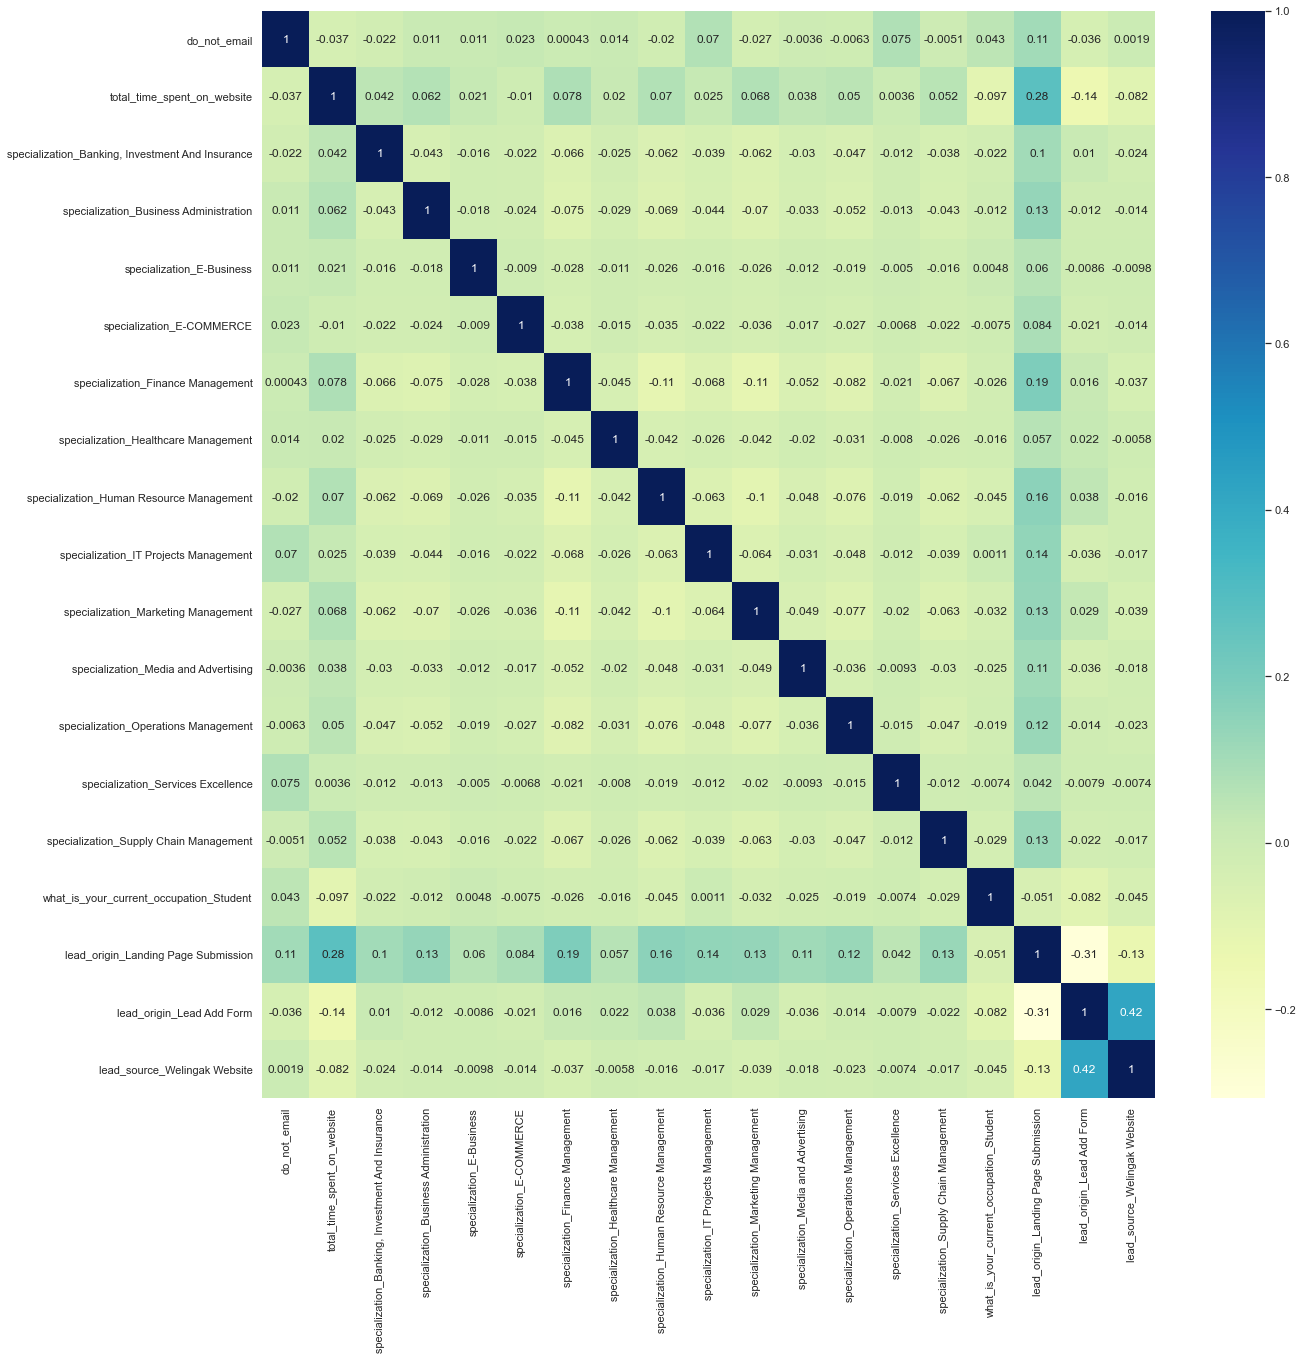

In [133]:
plt.figure(figsize = (20,20))
sns.heatmap(X_train_new.corr(), cmap = 'YlGnBu', annot = True)
plt.show()

In [134]:
X_train_new.shape

(6435, 19)

In [135]:
y_train.shape

(6435,)

In [136]:
# Getting the predicted values on the train set
y_train_pred = logm3.fit().predict(X_train_sm)
y_train_pred[:10]

8287    0.074983
504     0.645864
4612    0.865579
5624    0.169121
1835    0.170225
1756    0.458368
6510    0.172986
9041    0.107301
498     0.116008
6858    0.023888
dtype: float64

In [137]:
# LEts convert the y_train_pred to array 
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07498271, 0.64586392, 0.86557938, 0.16912121, 0.17022503,
       0.45836798, 0.17298577, 0.10730095, 0.11600808, 0.02388789])

##### Creating a dataframe with the actual converted values and the predicted probabilities

In [138]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

Convert  Convert_Prob  CustID
0        0      0.074983    8287
1        0      0.645864     504
2        1      0.865579    4612
3        1      0.169121    5624
4        0      0.170225    1835

##### Creating new column 'predicted' with 1 if Convert_Prob > 0.3 else 0 . Considering the Optimal Cutoff Point to be 0.30

In [139]:
# from sklearn import metrics

y_train_pred_final['Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)

# # Let's see the head
y_train_pred_final.head()

Convert  Convert_Prob  CustID  Predicted
0        0      0.074983    8287          0
1        0      0.645864     504          1
2        1      0.865579    4612          1
3        1      0.169121    5624          0
4        0      0.170225    1835          0

In [140]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
print(confusion)

[[2981  984]
 [ 550 1920]]


In [141]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.Predicted))

0.7616161616161616


## Metrics beyond simply accuracy

In [142]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [143]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7773279352226721

In [144]:
# Let us calculate specificity
TN / float(TN+FP)

0.7518284993694829

In [145]:
# Calculate false postive rate - predicting converted when customer is not converted
print(FP/ float(TN+FP))

0.24817150063051702


In [146]:
# positive predictive value 
print (TP / float(TP+FP))

0.6611570247933884


In [147]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8442367601246106


## Plotting the ROC Curve

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

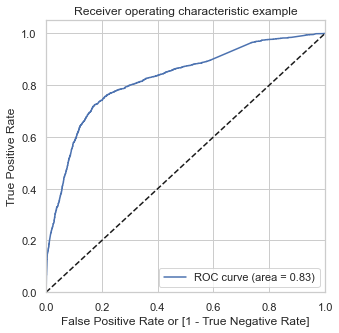

In [150]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.82 indicating a good predictive model.

### Precision and Recall

In [151]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.Predicted )
confusion

array([[2981,  984],
       [ 550, 1920]], dtype=int64)

##### Precision
TP / TP + FP

In [152]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6611570247933884

##### Recall
TP / TP + FN

In [153]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7773279352226721

### Precision and recall tradeoff

In [154]:
from sklearn.metrics import precision_recall_curve

In [155]:
y_train_pred_final.Convert, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       0
        ..
 6430    1
 6431    1
 6432    1
 6433    0
 6434    1
 Name: Convert, Length: 6435, dtype: int32,
 0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6430    1
 6431    1
 6432    1
 6433    0
 6434    1
 Name: Predicted, Length: 6435, dtype: int64)

In [156]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

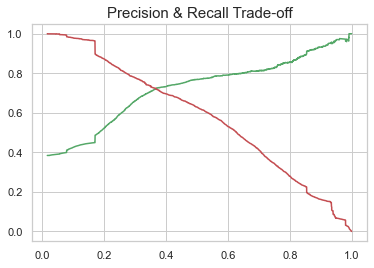

In [157]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision & Recall Trade-off", fontsize = 15)
plt.show()

## Making predictions on the test set

In [158]:
X_test[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]] = scaler.transform(X_test[["totalvisits", "total_time_spent_on_website", "page_views_per_visit"]])

In [159]:
# X_test = X_test[X_train_sm.columns]
# X_test.head()

X_test_new = X_test[X_train_new.columns]

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2759 entries, 5272 to 499
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   const                                             2759 non-null   float64
 1   do_not_email                                      2759 non-null   int64  
 2   total_time_spent_on_website                       2759 non-null   float64
 3   specialization_Banking, Investment And Insurance  2759 non-null   uint8  
 4   specialization_Business Administration            2759 non-null   uint8  
 5   specialization_E-Business                         2759 non-null   uint8  
 6   specialization_E-COMMERCE                         2759 non-null   uint8  
 7   specialization_Finance Management                 2759 non-null   uint8  
 8   specialization_Healthcare Management              2759 non-null   uint8  
 9   specialization_Hu

Making predictions on the test set

In [160]:
y_test_pred = logm3.fit().predict(X_test_sm)
y_test_pred[:10]

5272    0.086080
6750    0.331124
8958    0.334898
7584    0.170225
5896    0.170225
1168    0.705622
2506    0.079699
4016    0.170225
6455    0.178810
7003    0.979360
dtype: float64

In [161]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [162]:
#check
y_pred_1.head()

0
5272  0.086080
6750  0.331124
8958  0.334898
7584  0.170225
5896  0.170225

In [163]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [164]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [165]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [166]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [167]:
y_pred_final.head()

converted  CustID         0
0          0    5272  0.086080
1          0    6750  0.331124
2          1    8958  0.334898
3          0    7584  0.170225
4          0    5896  0.170225

In [168]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [169]:
y_pred_final.head()

converted  CustID  Convert_Prob
0          0    5272      0.086080
1          0    6750      0.331124
2          1    8958      0.334898
3          0    7584      0.170225
4          0    5896      0.170225

In [170]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final['Lead_Score'] = y_pred_final.Convert_Prob.map( lambda x: round(x*100))

In [171]:
y_pred_final['Lead_Score'].describe()

count    2759.000000
mean       38.678869
std        27.637018
min         1.000000
25%        17.000000
50%        27.000000
75%        61.500000
max       100.000000
Name: Lead_Score, dtype: float64

In [172]:
y_pred_final.head(10)

converted  CustID  Convert_Prob  final_predicted  Lead_Score
0          0    5272      0.086080                0           9
1          0    6750      0.331124                1          33
2          1    8958      0.334898                1          33
3          0    7584      0.170225                0          17
4          0    5896      0.170225                0          17
5          1    1168      0.705622                1          71
6          0    2506      0.079699                0           8
7          0    4016      0.170225                0          17
8          0    6455      0.178810                0          18
9          1    7003      0.979360                1          98

In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted)

0.7531714389271476

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.converted, y_pred_final.final_predicted )
confusion2

array([[1258,  440],
       [ 241,  820]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7728557964184731

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.7408716136631331

**'Observation'**

Train Data

Accuracy : 76%
Sensitivity : 77.57%
Specificity : 75.20%

Test Data

Accuracy : 75.71%
Sensitivity : 78.03%
Specificity : 74.26%

The Model seems to predict the Conversion Rate very well This should help the Sales team priortize the customers and thereby increase teh conversion rate

 